## Genetic Algo

 - Generate population
 - loop in
     1. check fitness
     2. cross
     3. mutate
 

#### Example of size 2 gnome

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
x1_range = [-100, 100]
x2_range = [-100, 100]

In [4]:
def populate(features, size=1000):
    
    initial = []
    
    for _ in range(size):
        entity = []
        for feature in features:
            val = np.random.randint(*feature)
            entity.append(val)
        initial.append(entity)
        
    return np.array(initial)

In [5]:
population = populate([x1_range, x2_range])

viruses = np.array([[10, -50, -50], [20, 5, 5]])

In [9]:
def draw(population, viruses):
    plt.scatter(population[:, 0], population[:, 1], c='r', s=6)
    plt.scatter(viruses[:, 1], viruses[:, 2], c='g', s=viruses[:, 0]*10)
    plt.xlim([-100, 100])
    plt.ylim([-100, 100])

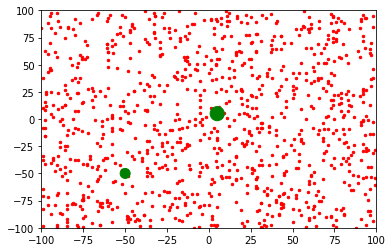

In [10]:
draw(population, viruses)

In [16]:
def fitness(population, viruses, size=100):
    
    scores = []
    
    for index, entity in enumerate(population):
        score = np.sum((entity - viruses[:, 1:]) ** 2, axis=1)
        score = np.sum(score * viruses[:, 0])
        scores.append((score, index))
    
    scores = sorted(scores)[:size]
    
    return np.array(scores)[:, 1]

In [17]:
def reduction(population, virus, size=100):
    
    fittest = fitness(population, virus, size)
    
    new_pop = []
    
    for item in fittest:
        new_pop.append(population[item])
    
    return np.array(new_pop)

In [18]:
population = reduction(population, viruses)

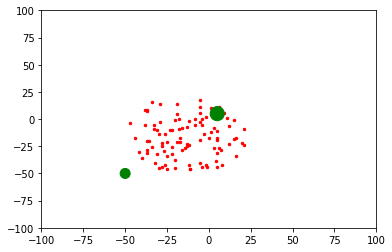

In [19]:
draw(population, viruses)

In [20]:
def cross(population, size=1000):
    
    new_pop = []
    
    for _ in range(size):
        f = population[np.random.randint(0, len(population))]
        s = population[np.random.randint(0, len(population))]

        # you can do it much better
        # we are taking half of each without random selection
        entity = []
        entity.append(*f[:len(f)//2])
        entity.append(*s[len(s)//2:])
        
        new_pop.append(entity)
        
    return np.array(new_pop)
    
def mutate(population):
    return population + np.random.randint(-10, 10, 2000).reshape(1000, 2)

In [21]:
population = cross(population)

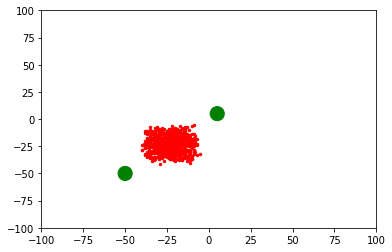

In [29]:
draw(population, viruses)

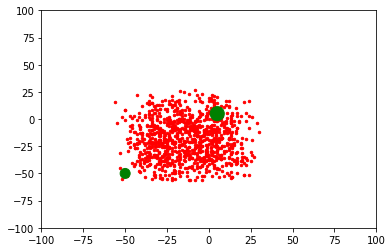

In [23]:
population = mutate(population)

draw(population, viruses)

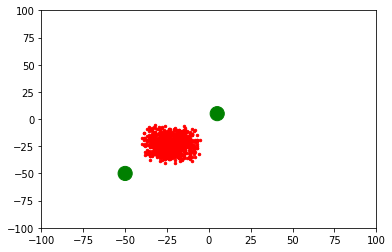

In [35]:
population = populate([x1_range, x2_range], 1000)
viruses = np.array([[20, -50, -50], [20, 5, 5]])

def cycle(population, viruses, gens=100):

    for _ in range(gens):
        population = reduction(population, viruses, 500)
        population = cross(population, 1000)
        population = mutate(population)
    
    return population

population = cycle(population, viruses)

draw(population, viruses)

In [15]:
population[0] - viruses[:, 1:]

array([[145, -35],
       [ 90, -90]])

In [13]:
population[0]

array([ 95, -85])

In [14]:
viruses

array([[ 10, -50, -50],
       [ 20,   5,   5]])